# Breast Cancer Project

# Lymph Node Metastasis Prediction Using miRNA Expression Data

# Preprocessing Step

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## Import Function

In [2]:
def read_object(obj_path):
    with open(obj_path, 'rb') as input:
        return pickle.load(input)

def save_object(obj, dir_path, file_name, file_extension='pkl', create_dir=True):
    if create_dir:
        if not os.path.isdir(dir_path):
            os.makedirs(dir_path)
    name = os.path.normpath(os.path.join(dir_path, file_name+'.'+file_extension))
    with open(name, 'wb') as output:  # overwrites any existing file
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
        return name

## Loading Data and Preparing Data Matrix and Target Vector

In [3]:
dir_path = 'F:/internship/Breast Cancer Project (Lymph Node Metastasis)(miRNA)/reading_breast_cancer/'
file_name = 'Samples.pkl'
samples = read_object(dir_path + file_name)

file_name = 'miRNA ID.pkl'  
miRNA_id = read_object(dir_path + file_name)

In [4]:
len(miRNA_id)

823

In [5]:
len(samples)

615

In [6]:
samples[0]

{'sample_id': 'TCGA.3C.AALI',
 'lymph_node_status': array(1, dtype=int8),
 'miRNA_values': array([12.9183, 13.9224, 12.9134, 14.5127,  9.6483,  9.0065,  9.1343,
         4.4543, 12.6791,  8.4592,  8.3933,  0.    ,  1.2725, 10.4019,
        11.7145,  4.727 , 14.2665,  3.1224,  4.889 ,  5.0207,  4.9924,
         9.0846,  5.8527, 16.5135, 14.851 ,  0.    ,  0.    ,  3.9369,
         0.2108,  0.    ,  0.    ,  0.2108,  0.    ,  0.    ,  0.    ,
         0.    ,  1.0712,  0.    ,  0.8372,  0.    ,  0.3946,  0.3946,
         0.    ,  0.    ,  0.    ,  0.2108,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  1.2725,  0.    ,  2.1055,
         0.3946,  0.5577,  0.    ,  0.    ,  0.    ,  0.    ,  0.2108,
         0.2108,  0.    ,  0.    ,  0.5577,  8.5168,  8.4154,  3.0961,
        11.24  ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  5.8048,
         0.    ,  0.    ,  8.9031,  1.3635,  1.4491,  1.1753,  0.    ,
         0.    ,  0.    ,  0.3946,  0.7042,  0.    ,  6.30

In [7]:
samples_num = len(samples)
features_num = len(miRNA_id)

data_matrix = np.zeros((samples_num, features_num))
target_vector = np.zeros((samples_num), dtype=np.int8)

for i in range(samples_num):
    data_matrix[i, :] = samples[i]['miRNA_values']
    target_vector[i] = samples[i]['lymph_node_status']

In [8]:
data_matrix.shape

(615, 823)

In [9]:
target_vector.shape

(615,)

## Train-Test Split

In [10]:
train_matrix, test_matrix, train_target, test_target = train_test_split(data_matrix, target_vector, test_size=0.2, random_state=42, stratify=target_vector)

In [11]:
train_matrix.shape

(492, 823)

In [12]:
test_matrix.shape

(123, 823)

## Normalization

In [15]:
scaler = MinMaxScaler()
scaler.fit(train_matrix)
normal_train_matrix = scaler.transform(train_matrix)
normal_test_matrix = scaler.transform(test_matrix)

## PCA and Visualization

In [16]:
pca = PCA(n_components=2)
pca.fit(normal_train_matrix)
train_pca_matrix = pca.transform(normal_train_matrix)
test_pca_matrix = pca.transform(normal_test_matrix)
print(train_pca_matrix.shape)
print(test_pca_matrix.shape)

(492, 2)
(123, 2)


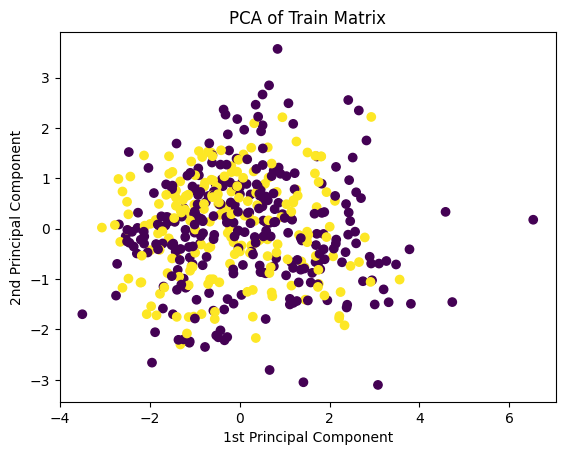

In [17]:
plt.Figure(figsize=(10,10))
fig = plt.scatter(train_pca_matrix[:,0], train_pca_matrix[:,1], c=train_target)
plt.title('PCA of Train Matrix')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.show()

## Classifying based on the PCA Data Matrix

In [18]:
n_components = 300
pca = PCA(n_components=n_components)
pca.fit(normal_train_matrix)
train_pca_matrix = pca.transform(normal_train_matrix)
test_pca_matrix = pca.transform(normal_test_matrix)
print(train_pca_matrix.shape)
print(test_pca_matrix.shape)

(492, 300)
(123, 300)


--------------------------------------------------
Training set
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       286
           1       0.87      0.87      0.87       206

    accuracy                           0.89       492
   macro avg       0.89      0.89      0.89       492
weighted avg       0.89      0.89      0.89       492



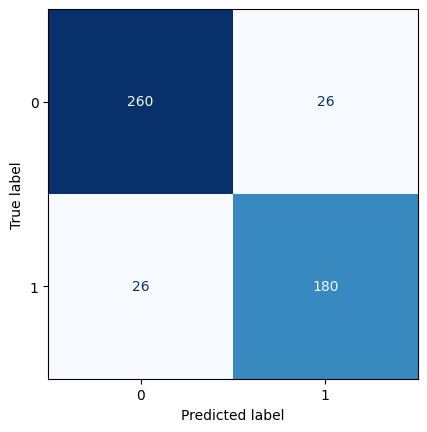

--------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.60      0.56      0.58        71
           1       0.45      0.48      0.46        52

    accuracy                           0.53       123
   macro avg       0.52      0.52      0.52       123
weighted avg       0.53      0.53      0.53       123



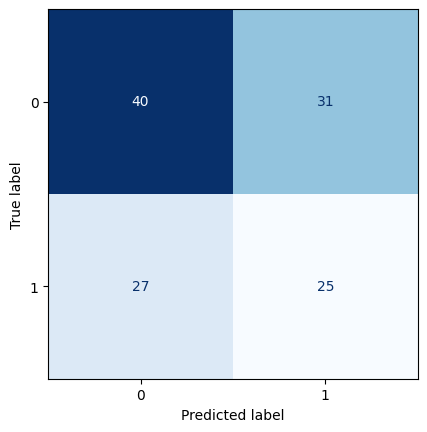

In [22]:
model = LinearDiscriminantAnalysis()
#model = QuadraticDiscriminantAnalysis()
#model = GaussianNB()
model.fit(train_pca_matrix, train_target)
train_pred = model.predict(train_pca_matrix)
test_pred = model.predict(test_pca_matrix)
print('-'*50)
print('Training set')
print(classification_report(train_target, train_pred))

ConfusionMatrixDisplay.from_predictions(train_target, train_pred, cmap='Blues', colorbar=False)
plt.show()

print('-'*50)
print('Test set')
print(classification_report(test_target, test_pred))
ConfusionMatrixDisplay.from_predictions(test_target, test_pred, cmap='Blues', colorbar=False)
plt.show()

## Saving Result

In [23]:
dir_path = 'F:/internship/Breast Cancer Project (Lymph Node Metastasis)(miRNA)/preprocessing/' 
file_name = 'Train Matrix'
save_object(train_matrix, dir_path, file_name)

file_name = 'Test Matrix'
save_object(test_matrix, dir_path, file_name)

file_name = 'Train Target'
save_object(train_target, dir_path, file_name)

file_name = 'Test Target'
save_object(test_target, dir_path, file_name)

'F:\\internship\\Breast Cancer Project (Lymph Node Metastasis)(miRNA)\\preprocessing\\Test Target.pkl'